In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [10]:
df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Physical_Interpretability_0.1.csv", sep=";", index_col=0)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df

,MLP,LSTM,GRU,RF,Transformer,GTN,TFT,CNN
d2m,0,1,1,0,1,0,0,0
lc_agriculture,0,0,0,0,0,1,0,1
lc_forest,0,0,0,1,1,1,1,1
lc_grassland,1,1,1,1,1,1,1,1
lc_settlement,1,0,0,1,0,0,0,0
lc_shrubland,0,0,0,0,0,0,0,0
lc_sparse_vegetation,0,0,0,1,0,0,0,0
lc_water_bodies,0,1,1,1,1,1,1,0
lc_wetland,0,0,0,0,0,0,0,0
lst_day,1,1,1,1,1,1,1,1


In [5]:
physical_knowledge = {
    "t2m": "+", "d2m": "-", "lc_agriculture": "+", "lc_forest": "+", "lc_grassland": "+",
    "lc_settlement": "-", "lc_shrubland": "+", "lc_sparse_vegetation": "+", "lc_water_bodies": "-",
    "lc_wetland": "-", "lst_day": "+", "lst_night": "+", "rh": "-", "roads_distance": "+", "slope": "+",
    "smi": "-", "ssrd": "+", "tp": "-", "wind_speed": "+"
}

In [6]:
df_plot = df.copy().astype(str).replace({"1.0": "Y", "0.0": "N", "1": "Y", "0": "N"})
df_plot = df_plot.T
df_plot.loc["Physical-knowledge"] = [physical_knowledge.get(var, "") for var in df_plot.columns]

In [7]:
def get_color(val):
    return {
        "Y": "#f4a7b9",  # rosa
        "N": "#9ba4b5",  # grau
        "+": "#c1121f",  # rot
        "-": "#669bbc"   # blau
    }.get(val, "#ffffff")  # weiß fallback

colors = np.vectorize(get_color)(df_plot.values)

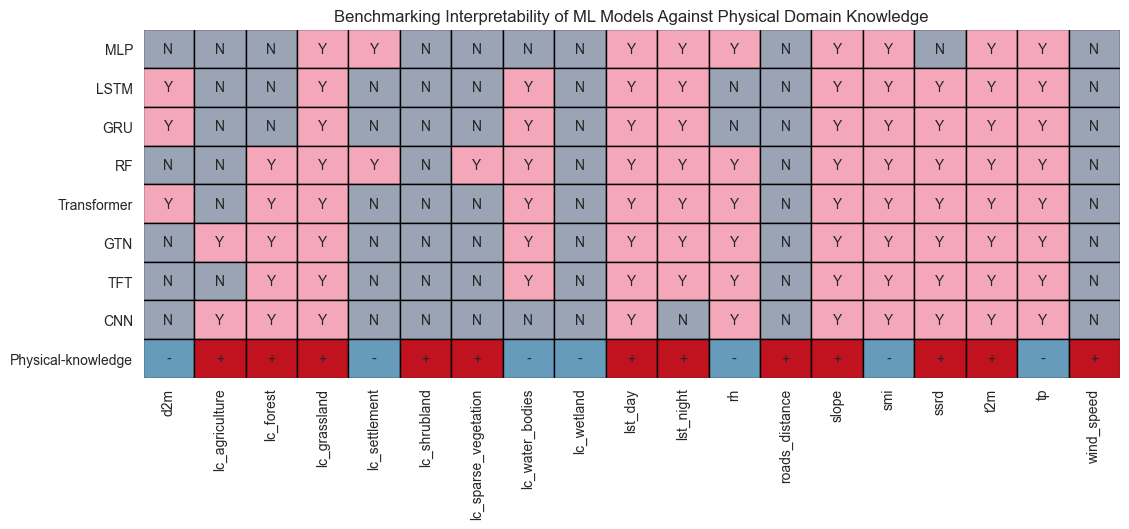

In [8]:
fig, ax = plt.subplots(figsize=(len(df_plot.columns)*0.6, len(df_plot)*0.6))

# Farbe pro Zelle
for (i, j), val in np.ndenumerate(df_plot.values):
    ax.add_patch(plt.Rectangle((j, i), 1, 1, color=get_color(val), ec='black'))
    ax.text(j + 0.5, i + 0.5, val, ha='center', va='center', fontsize=10)

ax.set_xlim(0, len(df_plot.columns))
ax.set_ylim(0, len(df_plot.index))
ax.set_xticks(np.arange(len(df_plot.columns)) + 0.5)
ax.set_yticks(np.arange(len(df_plot.index)) + 0.5)
ax.set_xticklabels(df_plot.columns, rotation=90)
ax.set_yticklabels(df_plot.index)
ax.invert_yaxis()
ax.set_title("Benchmarking Interpretability of ML Models Against Physical Domain Knowledge")
plt.tight_layout()
plt.show()

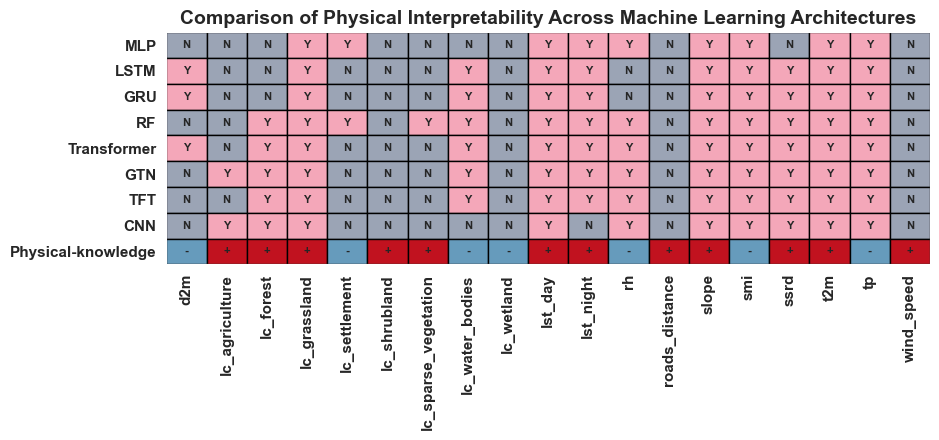

In [9]:
fig, ax = plt.subplots(figsize=(len(df_plot.columns)*0.5, len(df_plot)*0.5))  

# Farbe pro Zelle
for (i, j), val in np.ndenumerate(df_plot.values):
    ax.add_patch(plt.Rectangle((j, i), 1, 1, color=get_color(val), ec='black'))
    ax.text(j + 0.5, i + 0.5, val, ha='center', va='center', fontsize=8, fontweight='bold')

# Achsenbegrenzung
ax.set_xlim(0, len(df_plot.columns))
ax.set_ylim(0, len(df_plot.index))

# Achsenticks
ax.set_xticks(np.arange(len(df_plot.columns)) + 0.5)
ax.set_yticks(np.arange(len(df_plot.index)) + 0.5)
ax.set_xticklabels(df_plot.columns, rotation=90, fontsize=11, fontweight='bold')
ax.set_yticklabels(df_plot.index, fontsize=11, fontweight='bold')

# Stil
ax.invert_yaxis()
ax.set_title("Comparison of Physical Interpretability Across Machine Learning Architectures", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
model = "lstm"
path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/physical_consistency"
file = f"{model}_grouped_physical_consistency_0.25.csv"

In [10]:
df = pd.read_csv(f"{path}/{file}", sep=",")

In [11]:
df

,feature,physical_sign,n_considered,n_consistent,consistency_score
0,d2m,-,3306,2457,0.743194
1,lc_agriculture,+,3735,584,0.156359
2,lc_forest,+,3825,1256,0.328366
3,lc_grassland,+,3887,2262,0.581940
4,lc_settlement,-,172,115,0.668605
5,lc_shrubland,+,3891,1029,0.264456
6,lc_sparse_vegetation,+,3913,1623,0.414771
7,lc_water_bodies,-,58,38,0.655172
8,lc_wetland,-,33,2,0.060606
9,lst_day,+,3339,3257,0.975442


In [12]:
def compare_consistency_thresholds(model: str):
    files = {
        "0.0": f"{model}_grouped_physical_consistency_0.0.csv",
        "0.1": f"{model}_grouped_physical_consistency_0.1.csv",
        "0.25": f"{model}_grouped_physical_consistency_0.25.csv",
        "default": f"{model}_grouped_physical_consistency.csv",
        #"quantile": f"{model}_grouped_physical_consistency_quantiles.csv"
    }

    summary = {}

    for label, filename in files.items():
        full_path = os.path.join(path, filename)
        if not os.path.exists(full_path):
            print(f"⚠️ Datei nicht gefunden: {filename}")
            continue

        df = pd.read_csv(full_path)
        count_above_05 = (df["consistency_score"] > 0.5).sum()
        total = len(df)
        ratio = count_above_05 / total if total > 0 else 0.0

        summary[label] = {
            "filename": filename,
            "n_features": total,
            "n_above_0.5": count_above_05,
            "ratio_above_0.5": ratio,
        }

    # Beste Datei ermitteln
    best_key = max(summary, key=lambda k: summary[k]["ratio_above_0.5"])
    best_entry = summary[best_key]

    print("\n📊 Vergleich der Physical Consistency Scores:")
    for key, entry in summary.items():
        print(f"- Schwelle {key}: {entry['n_above_0.5']}/{entry['n_features']} > 0.5 "
              f"({entry['ratio_above_0.5']:.2%}) – Datei: {entry['filename']}")

    print(f"\n✅ Beste Schwelle: '{best_key}' mit {best_entry['ratio_above_0.5']:.2%} über 0.5")

In [42]:
def get_physically_consistent_features(model: str, threshold: float = 0.5):
    file = f"{model}_grouped_physical_consistency_0.25.csv"
    full_path = os.path.join(path, file)

    df = pd.read_csv(full_path)
    consistent_feats = df[df["consistency_score"] > threshold]["feature"].tolist()

    print(f"✅ Physically consistent features for model '{model}' (score > {threshold}):")
    for feat in consistent_feats:
        print(f"- {feat}")

    print(f"\nTotal consistent features: {len(consistent_feats)}")

In [50]:
model= ("rf")
compare_consistency_thresholds(model)
get_physically_consistent_features(model, threshold=0.5)


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.25.csv
- Schwelle default: 12/19 > 0.5 (63.16%) – Datei: rf_grouped_physical_consistency.csv

✅ Beste Schwelle: '0.0' mit 68.42% über 0.5
✅ Physically consistent features for model 'rf' (score > 0.5):
- lc_forest
- lc_grassland
- lc_settlement
- lc_sparse_vegetation
- lc_water_bodies
- lst_day
- lst_night
- rh
- slope
- smi
- ssrd
- t2m
- tp

Total consistent features: 13


In [15]:
compare_consistency_thresholds("gru")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 10/19 > 0.5 (52.63%) – Datei: gru_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 10/19 > 0.5 (52.63%) – Datei: gru_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency_0.25.csv
- Schwelle default: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency.csv

✅ Beste Schwelle: '0.25' mit 57.89% über 0.5


In [72]:
compare_consistency_thresholds("mlp")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 9/19 > 0.5 (47.37%) – Datei: mlp_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 9/19 > 0.5 (47.37%) – Datei: mlp_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 9/19 > 0.5 (47.37%) – Datei: mlp_grouped_physical_consistency_0.25.csv
- Schwelle default: 9/19 > 0.5 (47.37%) – Datei: mlp_grouped_physical_consistency.csv
- Schwelle quantile: 8/19 > 0.5 (42.11%) – Datei: mlp_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.0' mit 47.37% über 0.5


In [74]:
compare_consistency_thresholds("transformer")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 11/19 > 0.5 (57.89%) – Datei: transformer_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 12/19 > 0.5 (63.16%) – Datei: transformer_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 12/19 > 0.5 (63.16%) – Datei: transformer_grouped_physical_consistency_0.25.csv
- Schwelle default: 12/19 > 0.5 (63.16%) – Datei: transformer_grouped_physical_consistency.csv

✅ Beste Schwelle: '0.1' mit 63.16% über 0.5


In [67]:
compare_consistency_thresholds("gru")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 10/19 > 0.5 (52.63%) – Datei: gru_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 10/19 > 0.5 (52.63%) – Datei: gru_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency_0.25.csv
- Schwelle default: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency.csv
- Schwelle quantile: 11/19 > 0.5 (57.89%) – Datei: gru_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.25' mit 57.89% über 0.5


In [70]:
compare_consistency_thresholds("gtn")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 11/19 > 0.5 (57.89%) – Datei: gtn_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 12/19 > 0.5 (63.16%) – Datei: gtn_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 13/19 > 0.5 (68.42%) – Datei: gtn_grouped_physical_consistency_0.25.csv
- Schwelle default: 13/19 > 0.5 (68.42%) – Datei: gtn_grouped_physical_consistency.csv
- Schwelle quantile: 12/19 > 0.5 (63.16%) – Datei: gtn_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.25' mit 68.42% über 0.5


In [68]:
compare_consistency_thresholds("tft")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 11/19 > 0.5 (57.89%) – Datei: tft_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 11/19 > 0.5 (57.89%) – Datei: tft_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 12/19 > 0.5 (63.16%) – Datei: tft_grouped_physical_consistency_0.25.csv
- Schwelle default: 12/19 > 0.5 (63.16%) – Datei: tft_grouped_physical_consistency.csv
- Schwelle quantile: 12/19 > 0.5 (63.16%) – Datei: tft_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.25' mit 63.16% über 0.5


In [69]:
compare_consistency_thresholds("rf")


📊 Vergleich der Physical Consistency Scores:
- Schwelle 0.0: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.0.csv
- Schwelle 0.1: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.1.csv
- Schwelle 0.25: 13/19 > 0.5 (68.42%) – Datei: rf_grouped_physical_consistency_0.25.csv
- Schwelle default: 12/19 > 0.5 (63.16%) – Datei: rf_grouped_physical_consistency.csv
- Schwelle quantile: 12/19 > 0.5 (63.16%) – Datei: rf_grouped_physical_consistency_quantiles.csv

✅ Beste Schwelle: '0.0' mit 68.42% über 0.5
